# Image Processing Lab: Hough Transform

# Hough Transform in Image Processing

## What is the Hough Transform?

The **Hough Transform** is a technique used in image processing to detect geometric shapes such as **lines** and **circles**. It transforms the detection problem from image space to a parameterized space (Hough space), where detecting shapes becomes easier.

### Basic Idea:
The **Hough Transform** can also be viewed as a way to detect straight lines in an image by representing each line with parameters such as **slope** \( m \) and **intercept** \( b \) from the equation of a line:

\[
y = mx + b
\]

In this case:
- \( m \) is the slope of the line (change in y over change in x).
- \( b \) is the y-intercept (the point where the line crosses the y-axis).

In the image, each point \( (x_i, y_i) \) belonging to the line contributes to a curve in the Hough space. The goal of the Hough Transform is to find the **values of \( m \) (slope)** and **\( b \) (intercept)** that best fit the line, even if the line is incomplete or noisy.

### Applications of Hough Transform

1. **Line Detection:**
   - Detects straight lines in images, even if they are partially occluded or broken.
   - Used in applications like **lane detection** for self-driving cars.

2. **Circle Detection:**
   - Detects circles by extending the basic Hough Transform to include parameters for the center and radius of the circle.
   - Applications include **object detection** in industrial settings and **medical imaging**.

3. **Shape Detection:**
   - Can detect more complex shapes such as **ellipses** and other parameterized curves.
   - Used in fields like **medical imaging** for detecting tumors or organs.

4. **Edge and Feature Detection:**
   - Often used alongside **edge detection algorithms** (e.g., Canny) to detect edges of shapes, lines, or curves.
   - Helps in extracting geometric features from images.

5. **Text Recognition and Document Processing:**
   - Detects lines of text or skewed documents to align text or images.

6. **Robot Vision:**
   - Used in **robotics** to detect obstacles and structural elements in the environment.

7. **Autonomous Vehicles:**
   - Detects road lanes and other linear structures in the environment for vehicle navigation.

8. **Architectural Layouts:**
   - Recognizes structural elements like **walls**, **doors**, and **windows** in building layouts.

9. **Medical Imaging:**
   - Helps detect anatomical structures like **blood vessels**, **bones**, or **tumors**.

### Advantages of the Hough Transform
- **Robustness to Noise:** Can detect shapes even if they are broken or missing.
- **Flexibility:** Can be extended to detect various shapes (lines, circles, ellipses, etc.).

### Disadvantages of the Hough Transform
- **Computational Complexity:** Can be computationally expensive, especially for complex shapes.
- **Memory Usage:** Requires large accumulator arrays for multi-dimensional shape detection.

## Conclusion

The **Hough Transform** is a powerful tool in image processing that is widely used for detecting geometric shapes like lines and circles. It is applied in various fields, including **computer vision**, **robotics**, **medical imaging**, and **autonomous vehicles**. While it has advantages like robustness to noise and flexibility, it can be computationally intensive and memory-consuming.


## 🧮 Colinearity Check Using the (m, c) Parameter Space

### ❓ Question:
Given the three points **(1, 2), (2, 3), (3, 4)**, check if they are colinear by analyzing the linear equation:

\[
y = mx + c
\]

We will:
1. Assume special cases (\( c = 0 \) and \( m = 0 \)) to test for origin or horizontal lines.
2. Use the general form \( c = y - mx \) to derive lines in (m, c) space.
3. Find their intersection to determine if the points lie on the same line.

---

### 🔹 Step 1: Check under special assumptions

| Point   | When \( c = 0 \) | When \( m = 0 \)
|---------|----------------------------------------|-------------------------------|
| (1,2)   | \( m = 2 \)              | \( c = 2 \)                   
| (2,3)   | \( m = 1.5 \)            | \( c = 3 \)                   
| (3,4)   | \( m = 1.33 \)           | \( c = 4 \)                   

🟥 Since the values of \( m \) and \( c \) differ across points, the points do **not** lie on a line through the origin (\( c = 0 \)) or a horizontal line (\( m = 0 \)).

---

### 🔹 Step 2: Use general form \( c = y - mx \)

| Point   | Expression for \( c \) |
|---------|------------------------|
| (1,2)   | \( c = -m + 2 \)       |
| (2,3)   | \( c = -2m + 3 \)      |
| (3,4)   | \( c = -3m + 4 \)      |

---

### 🔹 Step 3: Solve for intersection

We solve:
\[
\begin{align*}
-m + 2 &= -2m + 3 \Rightarrow m = 1 \Rightarrow c = 1 \\
-2m + 3 &= -3m + 4 \Rightarrow m = 1 \Rightarrow c = 1
\end{align*}
\]

✅ All lines intersect at the point **\( (m = 1, c = 1) \)**

So, the points lie on the same line:

\[
y = x + 1
\]

---

### ✅ Final Answer:

Yes, the points **(1, 2), (2, 3), (3, 4)** are **colinear**, and the equation of the line passing through them is:

\[
y = x + 1
\]


### 🔹 Step 4: Visualize the (m, c) space

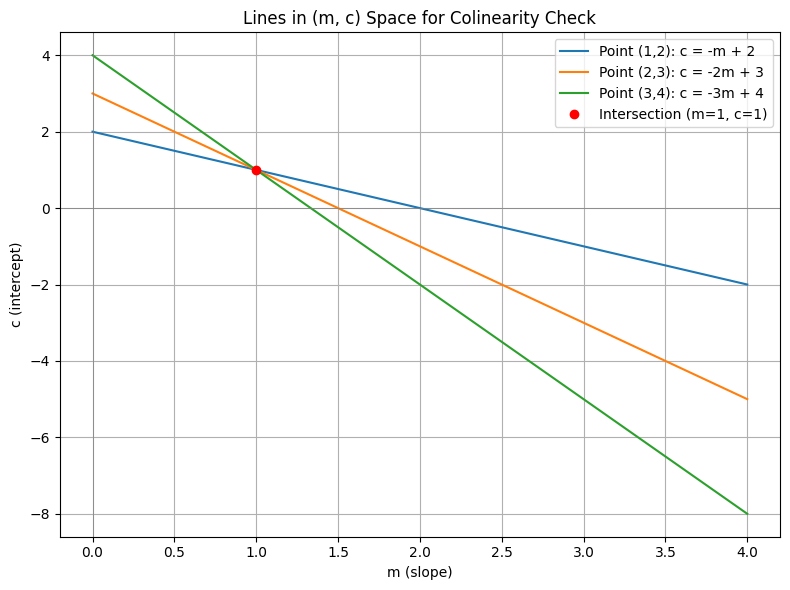

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of m values
m_values = np.linspace(0, 4, 400)

# Define the c(m) expressions for each point
c1 = -m_values + 2
c2 = -2 * m_values + 3
c3 = -3 * m_values + 4

# Plotting the lines
plt.figure(figsize=(8, 6))
plt.plot(m_values, c1, label='Point (1,2): c = -m + 2')
plt.plot(m_values, c2, label='Point (2,3): c = -2m + 3')
plt.plot(m_values, c3, label='Point (3,4): c = -3m + 4')

# Mark the intersection point
plt.plot(1, 1, 'ro', label='Intersection (m=1, c=1)')

# Labels and legend
plt.xlabel('m (slope)')
plt.ylabel('c (intercept)')
plt.title('Lines in (m, c) Space for Colinearity Check')
plt.grid(True)
plt.legend()
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.tight_layout()

plt.show()


## Code Implementation

### Steps

1. Grayscale Conversion
2. Gaussian Blurring
3. Edge Detection (Canny)
4. Region of Interest Masking
5. Hough Line Transform
6. Drawing Detected Lines on Original Image

We will use OpenCV for image processing and matplotlib for visualization.

### Import Libraries

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Image & Plot the image

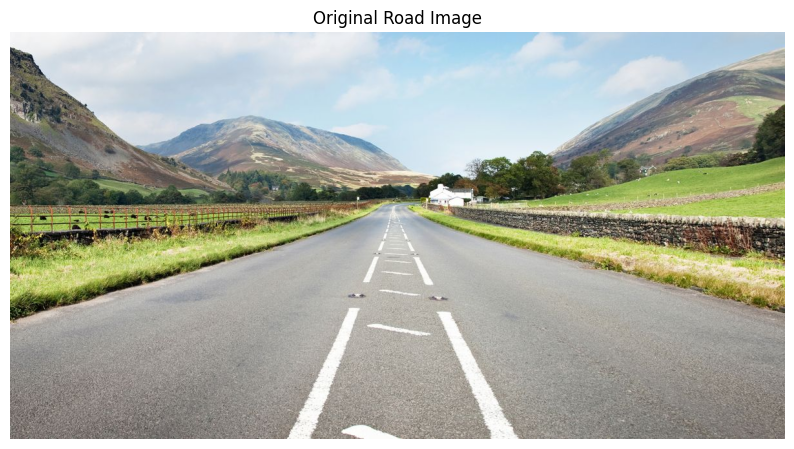

In [19]:
# Load the image
image = cv2.imread('Images/1.jpg')  

# Convert the image from BGR to RGB format for displaying with matplotlib
# OpenCV loads images in BGR format, so we need to convert it to RGB for correct color representation
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Original Road Image")
plt.axis('off')
plt.show()


### Preprocessing: Grayscale, Gaussian Blur, Canny Edge Detection

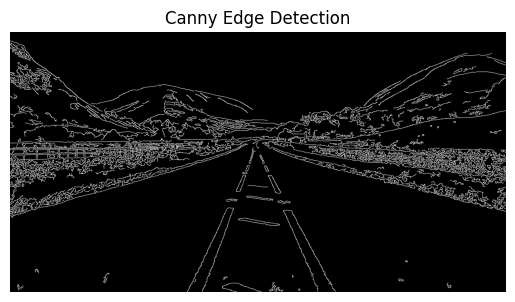

In [20]:
def preprocess(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise and improve edge detection
    # The kernel size (5, 5) is chosen to balance between detail and noise reduction
    # The sigma value of 0 means it will be calculated based on the kernel size
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    
    # Apply Canny edge detection
    # The thresholds (50, 150) are chosen to detect strong edges while ignoring weak ones
    # The first threshold is for edge linking, and the second is for edge detection 
    # 50 means that edges with intensity gradient less than 50 are discarded
    # 150 means that edges with intensity gradient greater than 150 are considered strong edges
    edges = cv2.Canny(blur, 50, 150)
    return edges

edges = preprocess(image)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


### Region of Interest ROI:
- In Lane Detection: Is usually a trapezoid or triangle covering the bottom half of the image (road area).

- Helps reduce noise and speed up processing by focusing only on potential lane regions.

- Prevents false detections in areas that cannot contain lanes (like the sky or buildings)

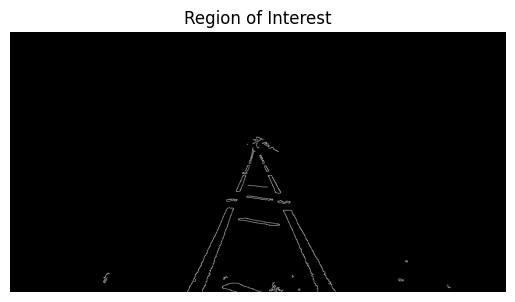

In [21]:
def region_of_interest(img):
    # Get image height and width
    height, width = img.shape

    # Create a black mask of the same size as the image
    mask = np.zeros_like(img)

    # Define a triangular polygon that covers the bottom center of the image
    # This area usually includes the lanes on the road
    polygon = np.array([[
        (int(0.1 * width), height),          # Bottom-left point
        (int(0.9 * width), height),          # Bottom-right point
        (int(0.5 * width), int(0.4 * height))  # Apex point (top-center)
    ]], np.int32)

    # Fill the polygon area on the mask with white (255)
    cv2.fillPoly(mask, polygon, 255)

    # Perform a bitwise AND between the edge image and the mask
    # This keeps only the region inside the polygon (lane area)
    cropped = cv2.bitwise_and(img, mask)

    return cropped

# Apply the region of interest mask to the edge-detected image
roi = region_of_interest(edges)


plt.imshow(roi, cmap='gray')
plt.title("Region of Interest")
plt.axis('off')
plt.show()


In [22]:
def detect_lines(img):
    # Apply the Probabilistic Hough Line Transform to detect straight lines
    lines = cv2.HoughLinesP(
        img,                # Input image (should be edge-detected and masked to ROI)
        rho=1,              # Distance resolution of the accumulator in pixels
        theta=np.pi / 180,  # Angle resolution of the accumulator in radians (1 degree)
        threshold=50,       # Minimum number of votes (intersections in accumulator) needed to detect a line
        minLineLength=300,   # Minimum length of a line (in pixels) — shorter lines will be ignored
        maxLineGap=150      # Maximum gap between line segments to treat them as a single line
    )
    return lines  # Return the list of detected lines (each line is defined by its endpoints)


In [23]:
def draw_lines(image, lines):
    # Create a blank image to draw lines on
    # The same size as the original image
    line_image = np.zeros_like(image)
    
    # Iterate through the detected lines
    # Each line is represented by its endpoints (x1, y1) and (x2, y2)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)
    
    # Combine the original image with the line image
    # The original image is blended with the line image using addWeighted
    combined = cv2.addWeighted(image, 0.8, line_image, 1, 1)
    return combined


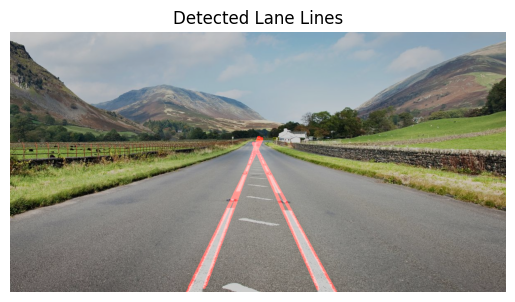

In [24]:
# Full pipeline
edges = preprocess(image)
roi = region_of_interest(edges)
lines = detect_lines(roi)
final_image = draw_lines(image_rgb, lines)

plt.imshow(final_image)
plt.title("Detected Lane Lines")
plt.axis('off')
plt.show()
